# 데이터 전처리 child_num 삭제x / split 0.3

In [1]:
# 윤민님 직업 예측 수정 train4.csv
# 전처리 진행
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import datasets, model_selection

train= pd.read_csv('train4.csv')

#train4.csv 결측치행, index 열 제거
train.dropna(inplace=True)
train.drop(['Unnamed: 0'], axis=1, inplace=True)

# 성별 분류
train['gender'] = train['gender'].replace(['F','M'],[0,1])

# 차량 소유 분류
train['car'] = train['car'].replace(['N','Y'],[0,1])

# 부동산(주택) 소유 분류
train['reality'] = train['reality'].replace(['N','Y'],[0,1])
train['family_type'] = train['family_type'].replace(['Married','Civil marriage','Single / not married','Separated','Widow'],[1,1,0,0,0])

train.loc[train['family_size'] >= 5,'family_size']=5
train.loc[train['child_num'] >= 3,'child_num']=3

train['age'] = train['DAYS_BIRTH']*(-1)/365
train['age'] = train['age'].round(0)

# train['begin_month'] = train['begin_month']* -1
# train.loc[train['DAYS_EMPLOYED'] >0,'DAYS_EMPLOYED']=0
# train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED']* -1
train.drop('DAYS_BIRTH',axis=1,inplace=True)

train['age']= -train['age']
# test['age']= -test['age']
train['income_total'] = train['income_total']/10000 


train_target = train[['credit']].copy()
train_data = train.drop('credit',axis=1).copy()


x_train, x_test, y_train, y_test = model_selection.train_test_split(train_data, 
                                                                    train_target, 
                                                                    test_size=0.3, 
                                                                    random_state=0)


# 표준화 , 원-핫 인코딩

In [2]:
numeric_features = ['child_num','income_total','DAYS_EMPLOYED','family_size', 'begin_month', 'age'] 
numeric_transformer = StandardScaler() # cf) RobustScaler

categorical_features = ['gender', 'car', 'reality','income_type','edu_type', 'family_type', 'house_type','work_phone','phone', 'email', 'occyp_type']
categorical_transformer = OneHotEncoder(categories='auto', handle_unknown='ignore') # categories='auto' : just for ignoring warning messages

preprocessor = ColumnTransformer(
    transformers=[ # List of (name, transformer, column(s))
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [3]:
preprocessor_pipe = Pipeline(steps=[('preprocessor', preprocessor)]) # preprocessing-only

In [4]:
x_train_transformed = preprocessor_pipe.fit_transform(x_train)
x_test_transformed = preprocessor_pipe.transform(x_test)

# ex) preprocessor_pipe.transform(x_train).todense()
x_train_transformed

array([[ 0.79873732,  0.25114229,  0.05136773, ...,  0.        ,
         0.        ,  0.        ],
       [-0.59963645,  0.20577259, -0.92394361, ...,  0.        ,
         0.        ,  0.        ],
       [-0.59963645, -0.74699111, -0.92394361, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.59963645,  0.84094839,  2.470391  , ...,  0.        ,
         0.        ,  0.        ],
       [ 3.59548487, -0.52014261, -0.64851234, ...,  0.        ,
         0.        ,  0.        ],
       [-0.59963645, -0.06644561,  0.92621781, ...,  0.        ,
         0.        ,  0.        ]])

In [5]:
x_train.isna()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,age
2703,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
23360,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3586,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15917,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8462,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19648,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9845,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10799,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
# 6개의 numeric variables & 11개의 categorical variables (각각 6개 & 11개 카테고리) 
# -> num 6 + cat : 48  = 54개의 새로운 열
# occyp_type : 18
# income_type :5
# edu_type : 5
# house_type : 6
# gen,car, reality, family_type, work_phone, phone, email : 7*2

x_train_transformed[0]

array([ 0.79873732,  0.25114229,  0.05136773,  0.89937497, -0.55290651,
       -0.84465783,  1.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

# 모델 학습, 평가

In [ ]:
pip install bayesian-optimization

In [ ]:
pip install lightgbm

# LightGBM

In [111]:
# feature 이름별로 그래프가 그려지게 시각화

# plot_importance() 를 이용한 피처 중요도 시각화
# 트리 기반의 모델은 트리를 만드는 결정에서 각 특성이 얼마나 중요한지 평가한 특성 중요도를 볼 수 있다.

#column_2 : reality
# 1 : car
# 5 : income_type
# 4 : income_total
# LightGBM 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from lightgbm import plot_importance
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
# import Common_Module.CMStat as CO

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target
#Best params: {'classifier__learning_rate': 0.01, 'classifier__loss': 'deviance', 'classifier__max_depth': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200, 'classifier__random_state': 0}

lgbm_wrapper = LGBMClassifier(n_estimators=400)
evals = [(x_test_transformed, y_test)]
lgbm_wrapper.fit(x_train_transformed, y_train, early_stopping_rounds=100, eval_metric='multi_logloss', eval_set=evals, verbose=True)
pred = lgbm_wrapper.predict(x_test_transformed)
pred_proba = lgbm_wrapper.predict_proba(x_test_transformed)[:1]
# CO.get_clf_eval(y_test, pred)

# fig, ax = plt.subplots(figsize=(10,12))
# plot_importance(lgbm_wrapper, ax=ax)
# plt.show() #54개의 feature가 전부 출력됨

[1]	valid_0's multi_logloss: 0.867502
[2]	valid_0's multi_logloss: 0.855081
[3]	valid_0's multi_logloss: 0.845431
[4]	valid_0's multi_logloss: 0.838082
[5]	valid_0's multi_logloss: 0.83179
[6]	valid_0's multi_logloss: 0.826421
[7]	valid_0's multi_logloss: 0.822407
[8]	valid_0's multi_logloss: 0.818831
[9]	valid_0's multi_logloss: 0.815652
[10]	valid_0's multi_logloss: 0.813254
[11]	valid_0's multi_logloss: 0.810655
[12]	valid_0's multi_logloss: 0.808802
[13]	valid_0's multi_logloss: 0.807275
[14]	valid_0's multi_logloss: 0.805667
[15]	valid_0's multi_logloss: 0.804357
[16]	valid_0's multi_logloss: 0.802724
[17]	valid_0's multi_logloss: 0.801655
[18]	valid_0's multi_logloss: 0.800714
[19]	valid_0's multi_logloss: 0.799965
[20]	valid_0's multi_logloss: 0.798742
[21]	valid_0's multi_logloss: 0.798225
[22]	valid_0's multi_logloss: 0.797452
[23]	valid_0's multi_logloss: 0.796712
[24]	valid_0's multi_logloss: 0.795879
[25]	valid_0's multi_logloss: 0.795089
[26]	valid_0's multi_logloss: 0.794

[213]	valid_0's multi_logloss: 0.769453
[214]	valid_0's multi_logloss: 0.769354
[215]	valid_0's multi_logloss: 0.769359
[216]	valid_0's multi_logloss: 0.76947
[217]	valid_0's multi_logloss: 0.769613
[218]	valid_0's multi_logloss: 0.769776
[219]	valid_0's multi_logloss: 0.769873
[220]	valid_0's multi_logloss: 0.769974
[221]	valid_0's multi_logloss: 0.770049
[222]	valid_0's multi_logloss: 0.770095
[223]	valid_0's multi_logloss: 0.770116
[224]	valid_0's multi_logloss: 0.770236
[225]	valid_0's multi_logloss: 0.770182
[226]	valid_0's multi_logloss: 0.770363
[227]	valid_0's multi_logloss: 0.770369
[228]	valid_0's multi_logloss: 0.770456
[229]	valid_0's multi_logloss: 0.770736
[230]	valid_0's multi_logloss: 0.770723
[231]	valid_0's multi_logloss: 0.770916
[232]	valid_0's multi_logloss: 0.771027
[233]	valid_0's multi_logloss: 0.771088
[234]	valid_0's multi_logloss: 0.771428
[235]	valid_0's multi_logloss: 0.771387
[236]	valid_0's multi_logloss: 0.771398
[237]	valid_0's multi_logloss: 0.771408
[

# 그리드 서치
# 평가 지표 (logloss , macro)

In [ ]:
# 그리드 서치
from sklearn.model_selection import GridSearchCV 
import lightgbm as lgb 
lgb=lgb.LGBMClassifier()
#Define the parameters 


parameters = {'num_leaves':[20,40,60,80,100], 'min_child_samples':[5,10,15],'max_depth':[-1,5,10,20], 'learning_rate':[0.05,0.1,0.2],'reg_alpha':[0,0.01,0.03]}#Define the scoring 
clf=GridSearchCV(lgb,parameters,scoring='accuracy') 
clf.fit(X=x_train_transformed, y=y_train) 
print(clf.best_params_) 
predicted=clf.predict(x_test_transformed) 
print('Classification of the result is:')
print(accuracy_score(y_test, predicted)) 
# {'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 15, 'num_leaves': 60, 'reg_alpha': 0.01}

In [112]:
# LightGBM 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split



params = {'learning_rate' : 0.1,
          'max_depth' : -1, #트리의 최대 깊이를 의미
          'n_estimators' : 100, #반복 수행하는 트리의 개수를 의미한다
          'min_child_samples' : 15, #최종 결정 클래스인 Leaf Node가 되기 위해서 최소한으로 필요한 데이터 개체의 수를 의미하며, 
                                   # 과적합을 제어하는 파라미터이다
          'objective' : 'multiclass', #다중 분류
          'num_class': 3, # 클래스 3개 (0, 1, 2)
          'metric' : 'multi_logloss',
          'boosting_type' : 'gbdt', # gbdt는 일반적인 GB 결정 트리 알고리즘 (gradient boosting decision tree)
          'n_jobs' : -1,
          'reg_alpha': 0.01, #L1 정규화를 위한 값
          'num_leaves': 60, 
          }
# LGBM 분류기 객체 생성
lgbm_wrapper = LGBMClassifier(**params)

# 학습, 테스트 데이터 분리
# X_train, X_test, y_train, y_test = train_test_split(ftr, target, test_size=0.2)

# model.fit(x_train_transformed, y_train)


# 조기 중단 기능에 필요한 파라미터 정의
evals = [(x_test_transformed, y_test)]
lgbm_wrapper.fit(x_train_transformed, y_train, eval_metric='multi_logloss', eval_set=evals, verbose=True)

preds = lgbm_wrapper.predict(x_test_transformed)
pred_proba = lgbm_wrapper.predict_proba(x_test_transformed)[:,1]


# 다양한 오차 측정 지표를 확인하기 위한 함수 정의

from sklearn.metrics import *

print("Precision Score 정밀도 : ",precision_score(y_test, predicted, pos_label='positive',average='macro'))
print("Recall Score 재현율 : ",recall_score(y_test, predicted, 
                                           pos_label='positive'
                                           ,average='macro')) 
print ('F1 정밀도와 재현율의 조화평균: ', round(f1_score(y_test, predicted, average='macro'), ndigits=4))
print ('Confusion 혼동행렬: \n', confusion_matrix(y_test, predicted))

[1]	valid_0's multi_logloss: 0.866845
[2]	valid_0's multi_logloss: 0.853139
[3]	valid_0's multi_logloss: 0.843271
[4]	valid_0's multi_logloss: 0.835305
[5]	valid_0's multi_logloss: 0.828628
[6]	valid_0's multi_logloss: 0.823379
[7]	valid_0's multi_logloss: 0.818241
[8]	valid_0's multi_logloss: 0.813998
[9]	valid_0's multi_logloss: 0.810795
[10]	valid_0's multi_logloss: 0.807598
[11]	valid_0's multi_logloss: 0.804262
[12]	valid_0's multi_logloss: 0.801983
[13]	valid_0's multi_logloss: 0.800288
[14]	valid_0's multi_logloss: 0.798227
[15]	valid_0's multi_logloss: 0.796948
[16]	valid_0's multi_logloss: 0.795744
[17]	valid_0's multi_logloss: 0.794448
[18]	valid_0's multi_logloss: 0.792959
[19]	valid_0's multi_logloss: 0.791874
[20]	valid_0's multi_logloss: 0.791299
[21]	valid_0's multi_logloss: 0.790098
[22]	valid_0's multi_logloss: 0.78952
[23]	valid_0's multi_logloss: 0.788503
[24]	valid_0's multi_logloss: 0.787894
[25]	valid_0's multi_logloss: 0.787137
[26]	valid_0's multi_logloss: 0.786

In [96]:
#Macro-precision : 평균의 평균
# - 각 클래스의 평가 지표를 계산한 후, 모든 클래스에 대한 평균 값을 구한다.
#Micro-precision : 개수의 평균
# - 모든 클래스에 대한 결과를 하나의 혼동행렬로 정리한 후, 평가 지표를 계산한다.

# 클래스 불균형(Imbalance) 문제가 있는 데이터셋에서는 Micro-average가 조금 더 효과적인 평가지표가 된다
# https://junklee.tistory.com/116
print("Precision Score 정밀도 : ",precision_score(y_test, predicted, pos_label='positive',average='micro'))
print("Recall Score 재현율 : ",recall_score(y_test, predicted, 
                                           pos_label='positive'
                                           ,average='micro')) 
print ('F1 정밀도와 재현율의 조화평균: ', round(f1_score(y_test, predicted, average='micro'), ndigits=4))
print ('Confusion 혼동행렬: \n', confusion_matrix(y_test, predicted))

Precision Score 정밀도 :  0.6969249362159259
Recall Score 재현율 :  0.6969249362159259
F1 정밀도와 재현율의 조화평균:  0.6969
Confusion 혼동행렬: 
 [[  40  131  739]
 [  12  531 1237]
 [  34  104 4619]]


In [73]:
pred_train = clf.predict(x_train_transformed)
pred_train
from collections import Counter

cnt = Counter(pred_train)
print('가장 많이 있는 원소 차례대로 3개 뽑기 :', cnt.most_common(3))

가장 많이 있는 원소 차례대로 3개 뽑기 : [(2.0, 14937), (1.0, 1946), (0.0, 493)]


In [74]:
pred_test = clf.predict(x_test_transformed)
pred_test
cnt = Counter(pred_test)
print('가장 많이 있는 원소 차례대로 3개 뽑기 :', cnt.most_common(3))

가장 많이 있는 원소 차례대로 3개 뽑기 : [(2.0, 6595), (1.0, 766), (0.0, 86)]


In [75]:
# 모델 평가
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train,pred_train))
print(accuracy_score(y_test,pred_test))

0.7588052486187845
0.6969249362159259


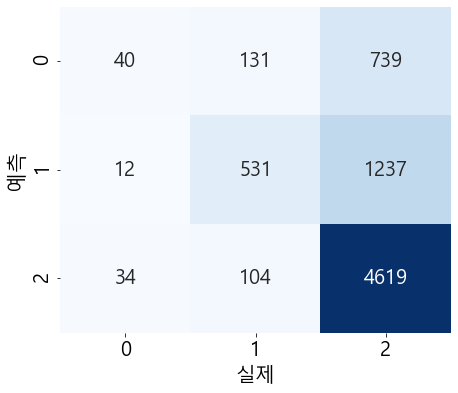

대각선 상의 값들이 올바른 예측

lightGBM
정밀도(Precision Score) :  0.6195689474590939
재현율(Recall Score) :  0.4377535901736784
F1-score (정밀도와 재현율의 조화평균):  0.4371
혼동행렬: 
 [[  40  131  739]
 [  12  531 1237]
 [  34  104 4619]]


In [103]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_test)
# print(cm)

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

mpl.rcParams['font.size'] = 20
plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
# plt.title('lightGBM')
plt.ylabel('예측')
plt.xlabel('실제')
plt.xticks([0.5, 1.5, 2.5], ['0', '1', '2'])
plt.yticks([0.5, 1.5, 2.5], ['0','1', '2'])
plt.show()
print('대각선 상의 값들이 올바른 예측')
print()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
def metrics(y, pred_y, title=None):
    print(title)
#     print("정확도(accuracy): ", accuracy_score(y, pred_y))
#     print("재현율(recall): ", recall_score(y, pred_y))
#     print("정밀도(precision): ", precision_score(y, pred_y))
#     print("F1 score: ", f1_score(y, pred_y))
    print("정밀도(Precision Score) : ",precision_score(y_test, predicted, pos_label='positive',average='macro'))
    print("재현율(Recall Score) : ",recall_score(y_test, predicted, 
                                           pos_label='positive'
                                           ,average='macro'))
    print ('F1-score (정밀도와 재현율의 조화평균): ', round(f1_score(y_test, predicted, average='macro'), ndigits=4))
    print ('혼동행렬: \n', confusion_matrix(y_test, predicted))
metrics(y_test, pred_test, "lightGBM")

In [107]:
# 직접 혼동행렬 해석하기
cm = confusion_matrix(y_test, predicted)
True_Positive = cm[0,0] + cm[1,1] + cm[2,2]
True_Positive #5190

True_Negative_for_0 = cm[1,1]+cm[1,2]+cm[2,1]+cm[2,2] #6491
True_Negative_for_1 = cm[0,0]+cm[0,2]+cm[2,0]+cm[2,2] #5432
True_Negative_for_2 = cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1] #714

False_Positive_for_0 = cm[1,0]+cm[2,0] #46
False_Positive_for_1 = cm[0,1]+cm[2,1] #235
False_Positive_for_2 = cm[0,2]+cm[1,2] #1976
FP = False_Positive_for_0 +False_Positive_for_1 +False_Positive_for_2 #2257
False_Negative_for_0 =cm[0,1]+cm[0,2] #870
False_Negative_for_1 =cm[1,0]+cm[1,2] #1249
False_Negative_for_2 =cm[2,0]+cm[2,1] #138
FN = False_Negative_for_0+False_Negative_for_1+False_Negative_for_2 #2257
acc = True_Positive/cm.sum()

# cm.sum(axis=0) #[  86,  766, 6595]
# cm.sum(axis=1) #[ 910, 1780, 4757]


precision = True_Positive / (True_Positive + FP) #0.6969249362159259
recall = True_Positive / (True_Positive+FN) #0.6969249362159259
F1 = 2*(precision*recall)/(precision+recall) #0.6969249362159259

# 베이시안 최적화

In [56]:
import lightgbm as lgbm
from bayes_opt import BayesianOptimization
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.model_selection import cross_validate

In [57]:
#목적함수 생성
def lgbm_cv(learning_rate, num_leaves, max_depth, min_child_weight, colsample_bytree, feature_fraction, bagging_fraction, lambda_l1, lambda_l2):
    model = lgbm.LGBMClassifier(learning_rate=learning_rate,
                                n_estimators = 100,
                                #boosting = 'dart',
                                num_leaves = int(round(num_leaves)),
                                max_depth = int(round(max_depth)),
                                min_child_weight = int(round(min_child_weight)),
                                colsample_bytree = colsample_bytree,
                                feature_fraction = max(min(feature_fraction, 1), 0),
                                bagging_fraction = max(min(bagging_fraction, 1), 0),
                                lambda_l1 = max(lambda_l1, 0),
                                lambda_l2 = max(lambda_l2, 0)
                               )
    scoring = {'roc_auc_score': make_scorer(roc_auc_score)}
#     x_train, x_test, y_train, y_test
    result = cross_validate(model, x_train_transformed, y_train, cv=5, scoring=scoring)
    auc_score = result["test_roc_auc_score"].mean()
    return auc_score

In [59]:
# 입력값의 탐색 대상 구간
pbounds = {'learning_rate' : (0.0001, 0.05),
           'num_leaves': (300, 600),
           'max_depth': (2, 25),
           'min_child_weight': (30, 100),
           'colsample_bytree': (0, 0.99),
           'feature_fraction': (0.0001, 0.99),
           'bagging_fraction': (0.0001, 0.99),
           'lambda_l1' : (0, 0.99),
           'lambda_l2' : (0, 0.99),
          }

In [60]:
#객체 생성
lgbmBO = BayesianOptimization(f = lgbm_cv, pbounds = pbounds, verbose = 2, random_state = 0 )

In [61]:
# 반복적으로 베이지안 최적화 수행
# acq='ei'사용
# xi=0.01 로 exploration의 강도를 조금 높임
lgbmBO.maximize(init_points=5, n_iter = 20, acq='ei', xi=0.01)

|   iter    |  target   | baggin... | colsam... | featur... | lambda_l1 | lambda_l2 | learni... | max_depth | min_ch... | num_le... |
-------------------------------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] feature_fraction is set=0.5967754659733202, colsample_bytree=0.7080374727086953 will be ignored. Current value: feature_fraction=0.5967754659733202
[LightGBM] [Warning] lambda_l1 is set=0.5394343511669278, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5394343511669278
[LightGBM] [Warning] bagging_fraction is set=0.5433704875376587, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5433704875376587
[LightGBM] [Warning] lambda_l2 is set=0.41941825134551564, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.41941825134551564
[LightGBM] [Warning] feature_fraction is set=0.5967754659733202, colsample_bytree=0.7080374727086953 will be ignored. Current value: feature_fracti

[LightGBM] [Warning] feature_fraction is set=0.968834296976213, colsample_bytree=0.8613120267643509 will be ignored. Current value: feature_fraction=0.968834296976213
[LightGBM] [Warning] lambda_l1 is set=0.7911669785745563, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7911669785745563
[LightGBM] [Warning] bagging_fraction is set=0.770397367765257, subsample=1.0 will be ignored. Current value: bagging_fraction=0.770397367765257
[LightGBM] [Warning] lambda_l2 is set=0.45686456863040253, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.45686456863040253
[LightGBM] [Warning] feature_fraction is set=0.968834296976213, colsample_bytree=0.8613120267643509 will be ignored. Current value: feature_fraction=0.968834296976213
[LightGBM] [Warning] lambda_l1 is set=0.7911669785745563, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7911669785745563
[LightGBM] [Warning] bagging_fraction is set=0.770397367765257, subsample=1.0 will be ignored. Current value: bagging_f

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [62]:
lgbmBO.max

{'target': nan,
 'params': {'bagging_fraction': 0.5433704875376587,
  'colsample_bytree': 0.7080374727086953,
  'feature_fraction': 0.5967754659733202,
  'lambda_l1': 0.5394343511669278,
  'lambda_l2': 0.41941825134551564,
  'learning_rate': 0.03233011624202614,
  'max_depth': 12.064505859041928,
  'min_child_weight': 92.42411005474558,
  'num_leaves': 589.0988281503088}}

In [63]:
#파라미터 적용
fit_lgbm = lgbm.LGBMClassifier(learning_rate=lgbmBO.max['params']['learning_rate'],
                               num_leaves = int(round(lgbmBO.max['params']['num_leaves'])),
                               max_depth = int(round(lgbmBO.max['params']['max_depth'])),
                               min_child_weight = int(round(lgbmBO.max['params']['min_child_weight'])),
                               colsample_bytree=lgbmBO.max['params']['colsample_bytree'],
                               feature_fraction = max(min(lgbmBO.max['params']['feature_fraction'], 1), 0),
                               bagging_fraction = max(min(lgbmBO.max['params']['bagging_fraction'], 1), 0),
                               lambda_l1 = lgbmBO.max['params']['lambda_l1'],
                               lambda_l2 = lgbmBO.max['params']['lambda_l2']
                               )

In [64]:
model = fit_lgbm.fit(x_train_transformed, y_train)

[LightGBM] [Warning] feature_fraction is set=0.5967754659733202, colsample_bytree=0.7080374727086953 will be ignored. Current value: feature_fraction=0.5967754659733202
[LightGBM] [Warning] lambda_l1 is set=0.5394343511669278, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5394343511669278
[LightGBM] [Warning] bagging_fraction is set=0.5433704875376587, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5433704875376587
[LightGBM] [Warning] lambda_l2 is set=0.41941825134551564, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.41941825134551564


In [80]:
BO_predicted = model.predict(x_test_transformed)

In [82]:
# clf.fit(X=x_train_transformed, y=y_train) 
# print(clf.best_params_) 
# predicted=clf.predict(x_test_transformed) 
# print('Classification of the result is:')
# print(accuracy_score(y_test, BO_predicted))

print("정밀도(Precision Score) : ",precision_score(y_test, BO_predicted, pos_label='positive',average='micro'))
print("재현율(Recall Score) : ",recall_score(y_test, BO_predicted, 
                                       pos_label='positive'
                                       ,average='micro'))
print ('F1-score (정밀도와 재현율의 조화평균): ', round(f1_score(y_test, BO_predicted, average='micro'), ndigits=4))
print ('혼동행렬: \n', confusion_matrix(y_test, BO_predicted))
# metrics(y_test, pred_test, "lightGBM")

정밀도(Precision Score) :  0.6914193635020813
재현율(Recall Score) :  0.6914193635020813
F1-score (정밀도와 재현율의 조화평균):  0.6914
혼동행렬: 
 [[   0  118  792]
 [   0  412 1368]
 [   0   20 4737]]


In [86]:
y_test#(7447, 1)

,credit
20269,2.0
21539,2.0
13968,2.0
14641,1.0
22954,2.0
...,...
1952,2.0
650,2.0
9735,0.0
3048,2.0


In [87]:
BO_predicted#(7447,)

array([2., 2., 2., ..., 2., 2., 2.])

# 결과 비교

In [155]:
BOcm = confusion_matrix(y_test, BO_predicted)
# cm.sum(axis=0) #[  86,  766, 6595]
# cm.sum(axis=1) #[ 910, 1780, 4757]

BOcm.sum(axis=0)#[   0,  550, 6897]
BOcm.sum(axis=1) #[ 910, 1780, 4757]

array([ 910, 1780, 4757], dtype=int64)

In [99]:
# LightGBM 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


params: {'bagging_fraction': 0.5433704875376587, # 오버피팅 방지를 위해 데이터 일부만 사용
  'colsample_bytree': 0.7080374727086953, #트리 생성에 필요한 샘플링에서 사용할 범위
  'feature_fraction': 0.5967754659733202, #열 샘플링
  'lambda_l1': 0.5394343511669278, # L1 정규화로 오버피팅 방지
  'lambda_l2': 0.41941825134551564, # L2 정규화
  'learning_rate': 0.03233011624202614, #학습률
  'max_depth': 12.064505859041928, # 트리의 최대 깊이
  'min_child_weight': 92.42411005474558,#leaf와 유사, 오버피팅 방지 너무 크면 오버피팅
  'num_leaves': 589.0988281503088, # 트리가 가질 수 있는 최대 leaf 갯수, 너무 크면 정확도와 복잡도 증가
  'objective' : 'multiclass', #다중 분류
  'num_class': 3, # 클래스 3개 (0, 1, 2)
  'metric' : 'multi_logloss',
'boosting_type' : 'gbdt'} 
    

# LGBM 분류기 객체 생성
lgbm_wrapper = LGBMClassifier(**params)

# 학습, 테스트 데이터 분리
# X_train, X_test, y_train, y_test = train_test_split(ftr, target, test_size=0.2)

# model.fit(x_train_transformed, y_train)


# 조기 중단 기능에 필요한 파라미터 정의
evals = [(x_test_transformed, y_test)]
lgbm_wrapper.fit(x_train_transformed, y_train, early_stopping_rounds=100, eval_metric='multi_logloss', eval_set=evals, verbose=True)

preds = lgbm_wrapper.predict(x_test_transformed)
pred_proba = lgbm_wrapper.predict_proba(x_test_transformed)[:,1]


# 다양한 오차 측정 지표를 확인하기 위한 함수 정의

from sklearn.metrics import *

print("Precision Score 정밀도 : ",precision_score(y_test, BO_predicted, pos_label='positive',average='macro'))
print("Recall Score 재현율 : ",recall_score(y_test, BO_predicted, 
                                           pos_label='positive'
                                           ,average='macro')) 
print ('F1 정밀도와 재현율의 조화평균: ', round(f1_score(y_test, BO_predicted, average='macro'), ndigits=4))
print ('Confusion 혼동행렬: \n', confusion_matrix(y_test, BO_predicted))

[1]	valid_0's multi_logloss: 0.866845
[2]	valid_0's multi_logloss: 0.853139
[3]	valid_0's multi_logloss: 0.843271
[4]	valid_0's multi_logloss: 0.835305
[5]	valid_0's multi_logloss: 0.828628
[6]	valid_0's multi_logloss: 0.823379
[7]	valid_0's multi_logloss: 0.818241
[8]	valid_0's multi_logloss: 0.813998
[9]	valid_0's multi_logloss: 0.810795
[10]	valid_0's multi_logloss: 0.807598
[11]	valid_0's multi_logloss: 0.804262
[12]	valid_0's multi_logloss: 0.801983
[13]	valid_0's multi_logloss: 0.800288
[14]	valid_0's multi_logloss: 0.798227
[15]	valid_0's multi_logloss: 0.796948
[16]	valid_0's multi_logloss: 0.795744
[17]	valid_0's multi_logloss: 0.794448
[18]	valid_0's multi_logloss: 0.792959
[19]	valid_0's multi_logloss: 0.791874
[20]	valid_0's multi_logloss: 0.791299
[21]	valid_0's multi_logloss: 0.790098
[22]	valid_0's multi_logloss: 0.78952
[23]	valid_0's multi_logloss: 0.788503
[24]	valid_0's multi_logloss: 0.787894
[25]	valid_0's multi_logloss: 0.787137
[26]	valid_0's multi_logloss: 0.786

In [ ]:
print(accuracy_score(y_test, BO_predicted)) #0.6914193635020813

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6988cc49-778f-4dcf-a2dc-70fd016d5812' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>